# Softmax Regression
This notebook is used to validate the training loop and to get reference results on a softmax regression model. The model is trained 3 times, on the following subsets of data:

- RGB images
- Depthmaps
- RGB + depthmaps

In [1]:
import numpy as np
import pathlib
import torch
from torch import nn
from torch.utils.tensorboard import SummaryWriter

import utils

DATA_PATH = pathlib.Path('../data')
RUNS_PATH = pathlib.Path('runs/softmax-reg')

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Dataset is read in only once. To drop single channels use boolean variables (rgb, depth). This doesn't change the dataset, but changes only the enabled channels, i.e. the data which is returned by the Dataset object.


Trainin set: 8370 samples of shape (28, 28, 4)

Sample: 6459
Label: hi


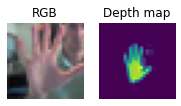


Validation set: 1440 samples of shape (28, 28, 4)

Sample: 559
Label: fist


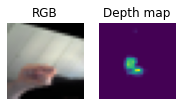

In [2]:
# Dataset filenames
train_ds = utils.HandDataset(DATA_PATH/'training_set.mat')
valid_ds = utils.HandDataset(DATA_PATH/'validation_set.mat')
# test_ds = utils.HandDataset(DATA_PATH/'test_set.mat')

# Data loaders
batch_size = 256
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True)
valid_dl = torch.utils.data.DataLoader(valid_ds, batch_size=batch_size, shuffle=False)
# test_dl = torch.utils.data.DataLoader(test_ds, batch_size=batch_size, shuffle=False)

# Visualization
print(f'\nTrainin set: {train_ds}')
train_ds.show_sample()
print(f'\nValidation set: {valid_ds}')
valid_ds.show_sample()
# print(f'\nTest set: {test_ds}')
# test_ds.show_sample()

## RGB + Depth-maps

In [3]:
net = utils.SoftmaxRegression(n_inputs=np.prod(train_ds.sample_shape), n_outputs=len(train_ds.classes))
loss_function = nn.CrossEntropyLoss()
n_epochs, lr = 10, 0.05
optimizer = torch.optim.SGD(net.parameters(), lr=lr, momentum=0.5)

utils.train(net, n_epochs, train_dl, loss_function, optimizer, valid_iter=valid_dl, log_dir=RUNS_PATH)

Training on device: cpu
epoch:    0	loss:0.023	accuracy:0.358	val-accuracy:0.34
epoch:    1	loss:0.0106	accuracy:0.537	val-accuracy:0.499
epoch:    2	loss:0.00945	accuracy:0.554	val-accuracy:0.603
epoch:    3	loss:0.00723	accuracy:0.611	val-accuracy:0.561
epoch:    4	loss:0.00213	accuracy:0.793	val-accuracy:0.618
epoch:    5	loss:0.00409	accuracy:0.733	val-accuracy:0.451
epoch:    6	loss:0.00712	accuracy:0.589	val-accuracy:0.593
epoch:    7	loss:0.00171	accuracy:0.843	val-accuracy:0.741
epoch:    8	loss:0.00114	accuracy:0.888	val-accuracy:0.765
epoch:    9	loss:0.00103	accuracy:0.906	val-accuracy:0.698


## RGB
Here only RGB data is kept, so depthmaps are not used.

In [4]:
train_ds.depth = False
valid_ds.depth = False
train_ds

8370 samples of shape (28, 28, 3)

In [5]:
net = utils.SoftmaxRegression(n_inputs=np.prod(train_ds.sample_shape), n_outputs=len(train_ds.classes))
loss_function = nn.CrossEntropyLoss()
n_epochs, lr = 10, 0.05
optimizer = torch.optim.SGD(net.parameters(), lr=lr, momentum=0.5)

utils.train(net, n_epochs, train_dl, loss_function, optimizer, valid_iter=valid_dl, log_dir=RUNS_PATH)

Training on device: cpu
epoch:    0	loss:0.0229	accuracy:0.373	val-accuracy:0.419
epoch:    1	loss:0.0157	accuracy:0.429	val-accuracy:0.523
epoch:    2	loss:0.00736	accuracy:0.607	val-accuracy:0.619
epoch:    3	loss:0.0079	accuracy:0.575	val-accuracy:0.588
epoch:    4	loss:0.00368	accuracy:0.706	val-accuracy:0.699
epoch:    5	loss:0.00223	accuracy:0.781	val-accuracy:0.54
epoch:    6	loss:0.00712	accuracy:0.598	val-accuracy:0.615
epoch:    7	loss:0.00388	accuracy:0.715	val-accuracy:0.697
epoch:    8	loss:0.00331	accuracy:0.764	val-accuracy:0.385
epoch:    9	loss:0.0024	accuracy:0.814	val-accuracy:0.717


## Depth-maps

In [6]:
train_ds.depth = True
train_ds.rgb = False
valid_ds.depth = True
valid_ds.rgb = False
train_ds

8370 samples of shape (28, 28, 1)

In [7]:
net = utils.SoftmaxRegression(n_inputs=np.prod(train_ds.sample_shape), n_outputs=len(train_ds.classes))
loss_function = nn.CrossEntropyLoss()
n_epochs, lr = 10, 0.05
optimizer = torch.optim.SGD(net.parameters(), lr=lr, momentum=0.5)

utils.train(net, n_epochs, train_dl, loss_function, optimizer, valid_iter=valid_dl, log_dir=RUNS_PATH)

Training on device: cpu
epoch:    0	loss:0.00421	accuracy:0.404	val-accuracy:0.395
epoch:    1	loss:0.00404	accuracy:0.516	val-accuracy:0.485
epoch:    2	loss:0.00393	accuracy:0.576	val-accuracy:0.537
epoch:    3	loss:0.00384	accuracy:0.62	val-accuracy:0.559
epoch:    4	loss:0.00376	accuracy:0.648	val-accuracy:0.576
epoch:    5	loss:0.0037	accuracy:0.658	val-accuracy:0.59
epoch:    6	loss:0.00364	accuracy:0.678	val-accuracy:0.589
epoch:    7	loss:0.00358	accuracy:0.678	val-accuracy:0.603
epoch:    8	loss:0.00354	accuracy:0.69	val-accuracy:0.61
epoch:    9	loss:0.00349	accuracy:0.698	val-accuracy:0.611
